# Урок 3. Feature Enginering


2. Практическая часть:
    - Feature Enginering

Cсылки:
    https://www.repath.in/gallery/feature_engineering_for_machine_learning.pdf


### Обзор методов

- линейные
- нелинейные 
- эмбединги

Пример с линейной моделью

Набор данных взят отсюда - https://www.kaggle.com/harlfoxem/housesalesprediction

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv(path + "kc_house_data.csv")
print(df.shape)
df.head(3)

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


В качестве предикторов (признаков) будем использовать  - bedrooms, sqft_living, sqft_lot и yr_built и еще немного

Целевая переменная - price (цена)

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
features = ["bedrooms","bathrooms" , "sqft_living", "sqft_lot", "yr_built", "floors","lat","long"]
target = "price"

#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], random_state=0)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

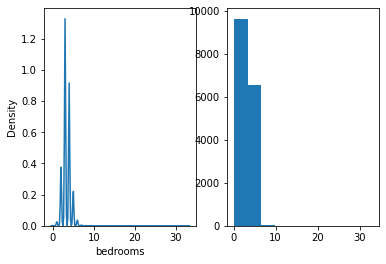

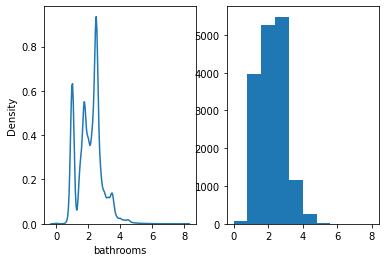

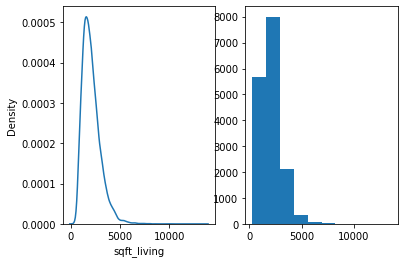

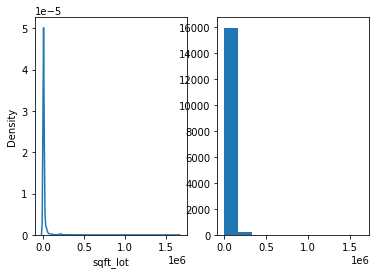

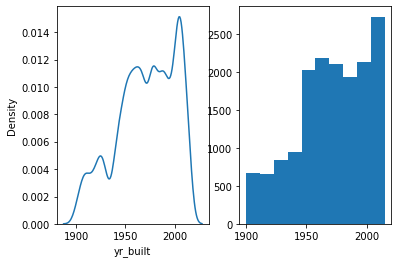

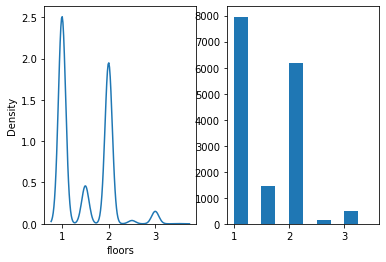

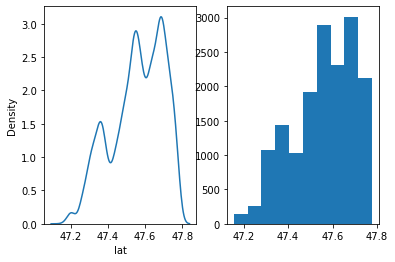

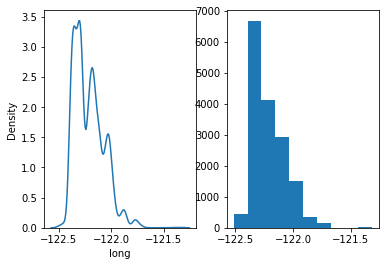

In [10]:
for name in features:
  plt.subplot(1,2,1)
  sns.kdeplot(X_train[name])
  plt.subplot(1,2,2)
  plt.hist(X_train[name])
  plt.show()

### **Простые и линейные действия**

In [11]:
#делим на блоки

Делим на блоки:
 - блоки одинакового размера
 - квартили
 - 

просто снижаем точность (делим на 10)

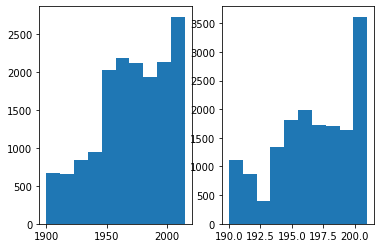

In [12]:
d = np.floor_divide( X_train['yr_built'], 10)
plt.subplot(1,2,1)
plt.hist(X_train['yr_built'])
plt.subplot(1,2,2)
plt.hist(d)
plt.show()

Разбиваем на интервалы

In [13]:
from sklearn.preprocessing import KBinsDiscretizer

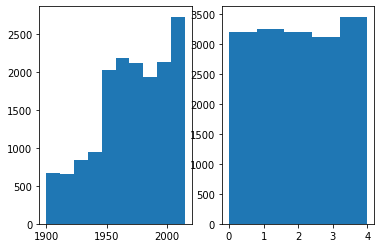

In [14]:
x_new = KBinsDiscretizer(n_bins=5, encode='ordinal').fit_transform(X_train['yr_built'].values.reshape(-1,1))
plt.subplot(1,2,1)
plt.hist(X_train['yr_built'])
plt.subplot(1,2,2)
plt.hist(x_new, bins = 5)
plt.show()

Строим квантили

In [15]:
X_train['yr_built'].quantile([0.25, 0.5, 0.75])

0.25    1951.0
0.50    1975.0
0.75    1997.0
Name: yr_built, dtype: float64

4 области

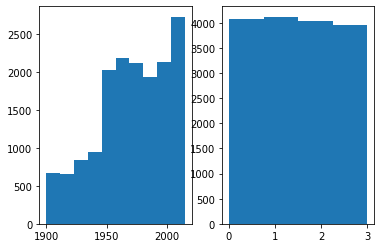

In [16]:
d4= pd.qcut(X_train['yr_built'], 4, labels=False)
plt.subplot(1,2,1)
plt.hist(X_train['yr_built'])
plt.subplot(1,2,2)
plt.hist(d4,bins=4)
plt.show()

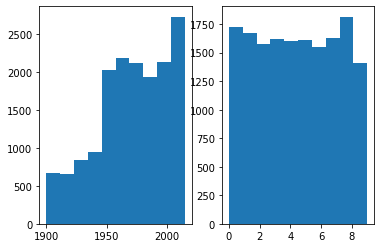

In [17]:
d10 =pd.qcut(X_train['yr_built'], 10, labels=False)
plt.subplot(1,2,1)
plt.hist(X_train['yr_built'])
plt.subplot(1,2,2)
plt.hist(d10)
plt.show()

In [18]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')

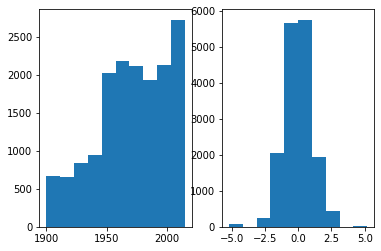

In [19]:
dq =qt.fit_transform(X_train['yr_built'].values.reshape(-1,1))
plt.subplot(1,2,1)
plt.hist(X_train['yr_built'])
plt.subplot(1,2,2)
plt.hist(dq)
plt.show()

Что еще можно:
 - Число бинов можно определить с использованием метрик (например mae)
 - Можно построить более точные границы

Логарифмические трансформации

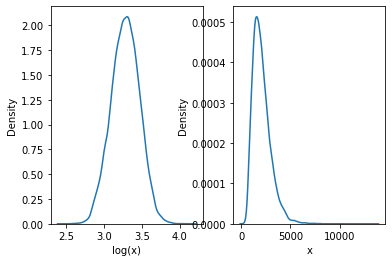

In [20]:
plt.subplot(1,2,1)
sns.kdeplot(np.log10(X_train['sqft_living'].values+1))
plt.xlabel('log(x)')
plt.subplot(1,2,2)
sns.kdeplot((X_train['sqft_living'].values+1))
plt.xlabel('x')
plt.show()

Бокс-Кокс 

In [21]:
from scipy import stats

парамтр для преобразования Бокса-Кокса:  0.030375517677652102


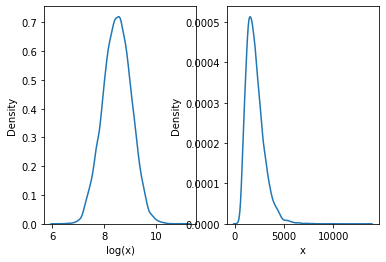

In [22]:
x_log, lyamb = stats.boxcox(  X_train['sqft_living']+1)

print('парамтр для преобразования Бокса-Кокса: ',lyamb)
plt.subplot(1,2,1)
sns.kdeplot(x_log)
plt.xlabel('log(x)')
plt.subplot(1,2,2)
sns.kdeplot((X_train['sqft_living'].values))
plt.xlabel('x')
plt.show()


Text(0.5, 1.0, 'box_Cox')

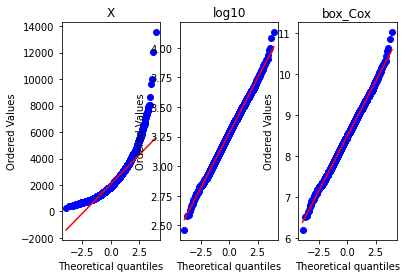

In [23]:
fig1, (ax1, ax2, ax3) = plt.subplots(1,3)

p3 = stats.probplot(x_log, dist=stats.norm, plot=ax3)
p1 = stats.probplot(X_train['sqft_living'], dist=stats.norm, plot=ax1)
p2 = stats.probplot(np.log10(X_train['sqft_living']), dist=stats.norm, plot=ax2)
ax1.set_title('X')
ax2.set_title('log10')
ax3.set_title('box_Cox')

In [24]:
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures


In [25]:
pT = PowerTransformer( method='box-cox')


In [26]:
x_new = pT.fit_transform(X_train.loc[:,['bathrooms','sqft_living']]+1)
x_new

array([[-1.57020105, -1.58789344],
       [-0.41921912, -0.5429353 ],
       [ 0.24407926, -0.30857084],
       ...,
       [ 0.24407926,  0.50178194],
       [-0.07911837,  0.51174317],
       [ 0.24407926,  0.52166375]])

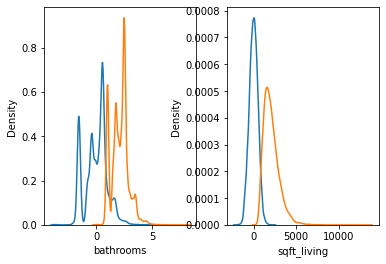

In [27]:
plt.subplot(1,2,1)
sns.kdeplot(x_new[:,0])
sns.kdeplot(X_train['bathrooms'].values)
plt.xlabel('bathrooms')
plt.subplot(1,2,2)
sns.kdeplot(x_new[:,1]*500)
sns.kdeplot((X_train['sqft_living'].values))
plt.xlabel('sqft_living')
plt.show()

Полиномиальная модель

на входе: 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mo stretchy="false">(</mo>
  <msub>
    <mi>X</mi>
    <mn>1</mn>
  </msub>
  <mo>,</mo>
  <msub>
    <mi>X</mi>
    <mn>2</mn>
  </msub>
  <mo stretchy="false">)</mo>
</math>
на выходе : 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>,</mo>
  <msub>
    <mi>X</mi>
    <mn>1</mn>
  </msub>
  <mo>,</mo>
  <msub>
    <mi>X</mi>
    <mn>2</mn>
  </msub>
  <mo>,</mo>
  <msubsup>
    <mi>X</mi>
    <mn>1</mn>
    <mn>^2</mn>
  </msubsup>
  <mo>,</mo>
  <msub>
    <mi>X</mi>
    <mn>1</mn>
  </msub>
  <msub>
    <mi>X</mi>
    <mn>2</mn>
  </msub>
  <mo>,</mo>
  <msubsup>
    <mi>X</mi>
    <mn>2</mn>
    <mn>^2</mn>
  </msubsup>
  <mo stretchy="false">)</mo>
</math>

In [28]:
pL = PolynomialFeatures( degree=2)

In [29]:
x_new = pL.fit_transform(X_train.loc[:,['bathrooms','sqft_living']])
x_new

array([[1.0000e+00, 1.0000e+00, 9.6000e+02, 1.0000e+00, 9.6000e+02,
        9.2160e+05],
       [1.0000e+00, 1.7500e+00, 1.5100e+03, 3.0625e+00, 2.6425e+03,
        2.2801e+06],
       [1.0000e+00, 2.2500e+00, 1.6700e+03, 5.0625e+00, 3.7575e+03,
        2.7889e+06],
       ...,
       [1.0000e+00, 2.2500e+00, 2.3600e+03, 5.0625e+00, 5.3100e+03,
        5.5696e+06],
       [1.0000e+00, 2.0000e+00, 2.3700e+03, 4.0000e+00, 4.7400e+03,
        5.6169e+06],
       [1.0000e+00, 2.2500e+00, 2.3800e+03, 5.0625e+00, 5.3550e+03,
        5.6644e+06]])

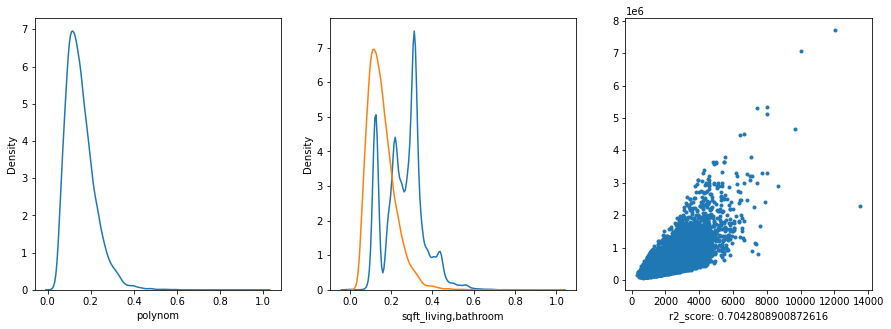

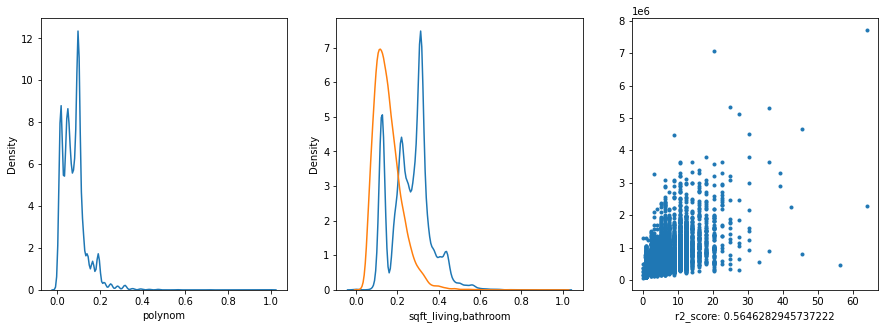

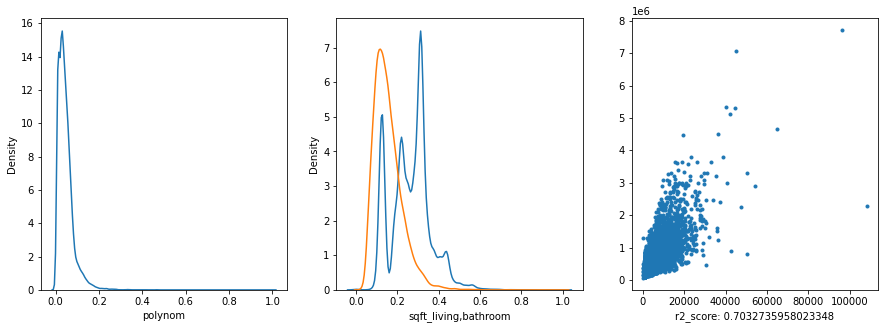

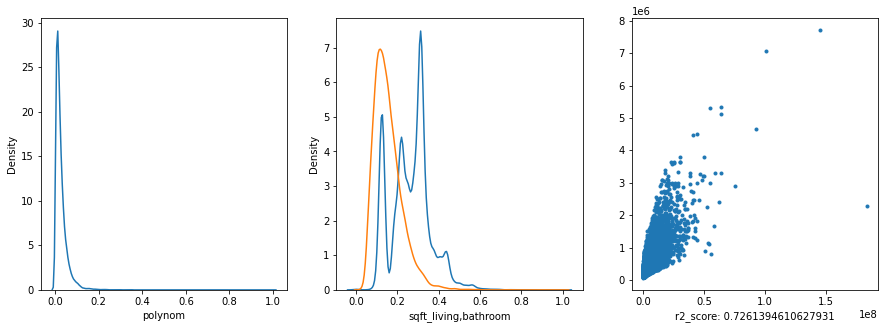

In [30]:

for i in range(2,x_new.shape[1]):
  plt.figure(figsize = (15,5))
  plt.subplot(1,3,1)
  sns.kdeplot(x_new[:,i]/np.max(x_new[:,i]))
  plt.xlabel('polynom')
  plt.subplot(1,3,2)

  sns.kdeplot(X_train['bathrooms'].values/np.max(X_train['bathrooms'].values))
  sns.kdeplot((X_train['sqft_living'].values/np.max(X_train['sqft_living'].values)))
  plt.xlabel('sqft_living,bathroom')

  plt.subplot(1,3,3)
  plt.plot(x_new[:,i],y_train,'.')

  r2_ = np.corrcoef(  y_train,x_new[:,i])
  plt.xlabel('r2_score: '+str(r2_[0,1]))
  plt.show()  




### **Эмбединги**

Ядерные трансформы (RBF функции)

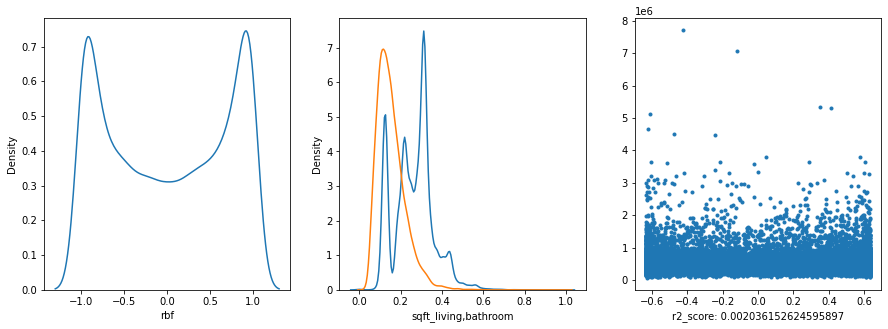

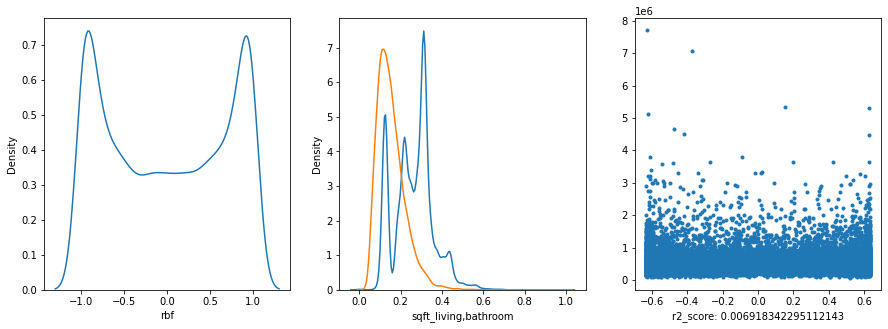

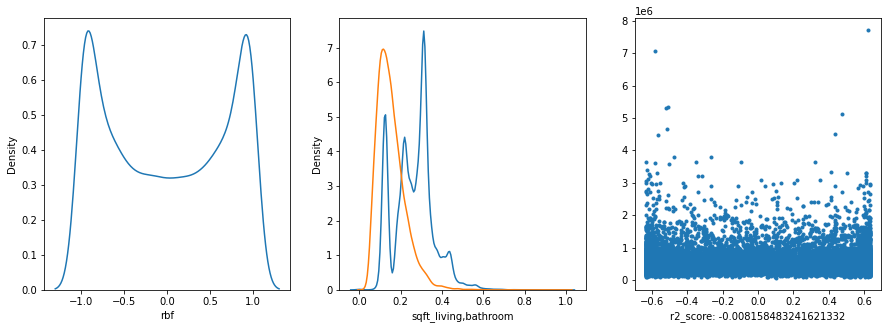

In [31]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.feature_extraction import FeatureHasher
features

ps =  RBFSampler(gamma=5, n_components=5)
x_new = ps.fit_transform(X_train.loc[:,features])#['bathrooms','sqft_living']])



for i in range(2,x_new.shape[1]):
  plt.figure(figsize = (15,5))
  plt.subplot(1,3,1)
  sns.kdeplot(x_new[:,i]/np.max(x_new[:,i]))
  plt.xlabel('rbf')
  plt.subplot(1,3,2)

  sns.kdeplot(X_train['bathrooms'].values/np.max(X_train['bathrooms'].values))
  sns.kdeplot((X_train['sqft_living'].values/np.max(X_train['sqft_living'].values)))
  plt.xlabel('sqft_living,bathroom')

  plt.subplot(1,3,3)
  plt.plot(x_new[:,i],y_train,'.')


  r2_ = np.corrcoef(  y_train,x_new[:,i])
  plt.xlabel('r2_score: '+str(r2_[0,1]))
  plt.show()  

In [32]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [33]:

linear_pca = PCA(n_components=2)


x_new = linear_pca.fit_transform(X_train.loc[:,features])


In [34]:


kernel_pca = KernelPCA(n_components=2)

x_new = linear_pca.fit_transform(X_train.loc[:,features])


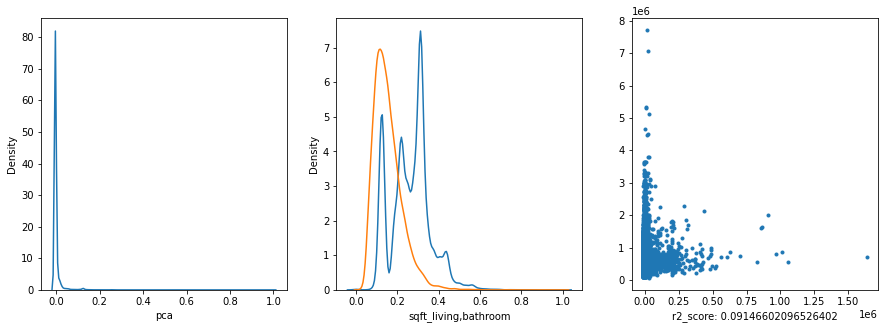

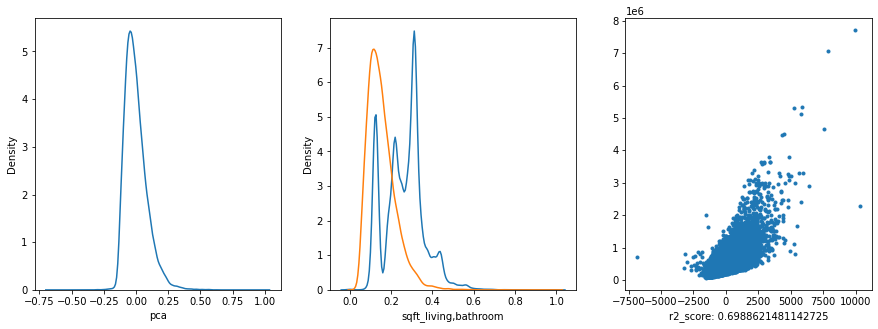

In [35]:

for i in range(x_new.shape[1]):
  plt.figure(figsize = (15,5))
  plt.subplot(1,3,1)
  sns.kdeplot(x_new[:,i]/np.max(x_new[:,i]))
  plt.xlabel('pca')
  plt.subplot(1,3,2)

  sns.kdeplot(X_train['bathrooms'].values/np.max(X_train['bathrooms'].values))
  sns.kdeplot((X_train['sqft_living'].values/np.max(X_train['sqft_living'].values)))
  plt.xlabel('sqft_living,bathroom')

  plt.subplot(1,3,3)
  plt.plot(x_new[:,i],y_train,'.')


  r2_ = np.corrcoef(  y_train,x_new[:,i])
  plt.xlabel('r2_score: '+str(r2_[0,1]))
  plt.show()

In [36]:
from sklearn.manifold import LocallyLinearEmbedding

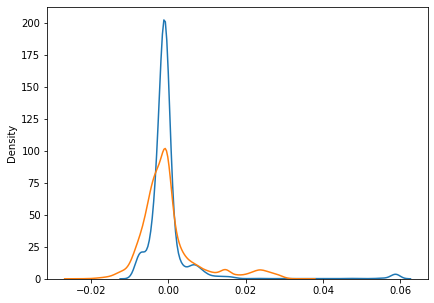

In [37]:
embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=10) # скрытое пространство размера 2
x_new = embedding.fit_transform(X_train)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
for i in range(x_new.shape[1]):
  sns.kdeplot(x_new[:,i])
plt.show()

In [38]:
from sklearn.cluster import KMeans as kmeans


[[ 32838.83332351 211870.06117347 888982.56884225  18054.60507838]
 [  1676.87355932 243091.31193391 920207.24493133  49205.26411898]
 [  1747.02906254 246396.44022911 923512.94595698  52506.61538598]]


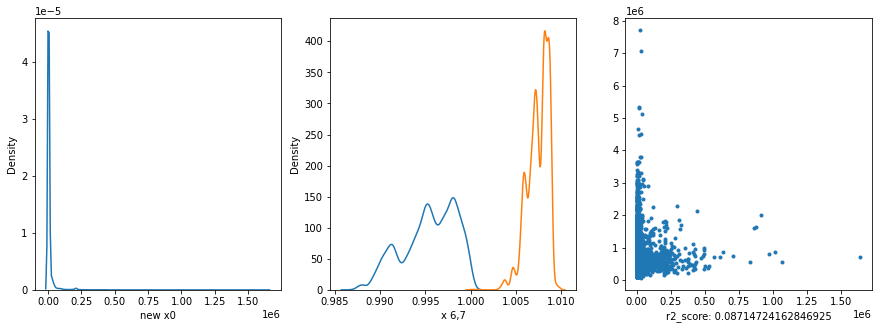

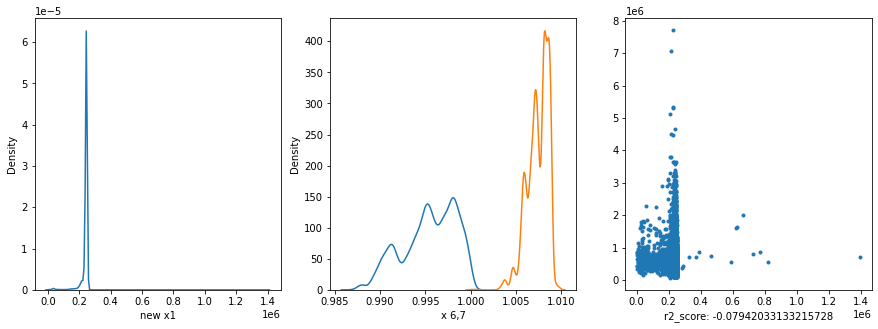

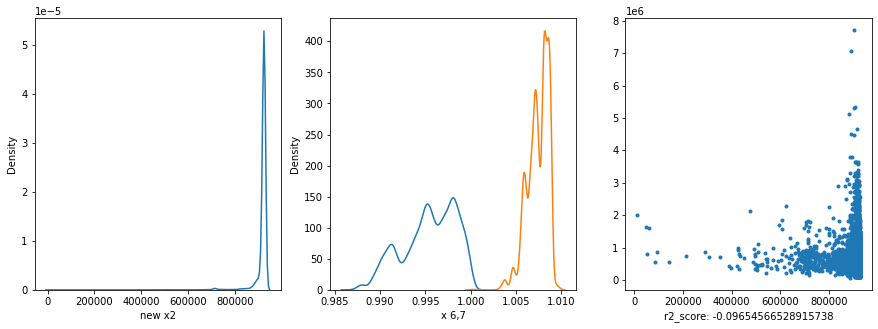

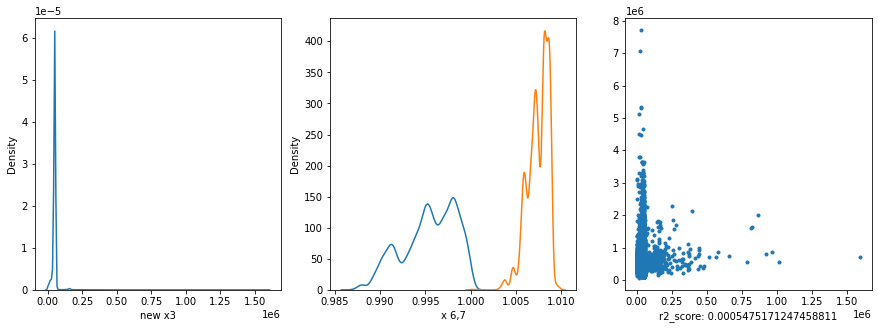

In [39]:
kmeans_ = kmeans(n_clusters=4).fit(X_train )
x_new = kmeans_.transform(X_train )
print(x_new[:3,:])

for i in range(x_new.shape[1]):
  plt.figure(figsize = (15,5))
  plt.subplot(1,3,1)
  sns.kdeplot(x_new[:,i])
  plt.xlabel('new x'+str(i))
  plt.subplot(1,3,2)

  sns.kdeplot(X_train.values[:,6]/np.max(X_train.values[:,6]))
  sns.kdeplot(X_train.values[:,7]/np.max(X_train.values[:,7]))
  plt.xlabel('x 6,7')

  plt.subplot(1,3,3)
  plt.plot(x_new[:,i],y_train,'.')


  r2_=np.corrcoef(  y_train,x_new[:,i])
  plt.xlabel('r2_score: '+str(r2_[0,1]))
  plt.show()

### **Хеширование**

[[ 1. -1.  0.]
 [-1. -1.  0.]
 [ 0. -2.  2.]]


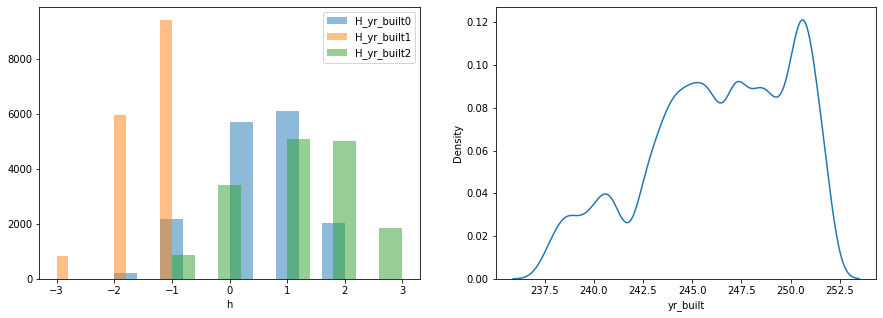

In [40]:

features

ps =  FeatureHasher( n_features=3,input_type='string' )
x_new = ps.fit_transform(X_train.loc[:,'yr_built'].astype(str)).toarray()#
print(x_new[:3,:])

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
for i in range(x_new.shape[1]):
  
  
  plt.hist(x_new[:,i], alpha = 0.5, label = 'H_yr_built'+str(i))
plt.xlabel('h')
plt.legend()
plt.subplot(1,2,2)

sns.kdeplot(X_train['yr_built'].values/np.max(X_train['bathrooms'].values))
  
plt.xlabel('yr_built')

  
plt.show()  

Много всего другого

### Категорийные признаки


OHE

In [41]:
X_train['bathrooms'].unique()

array([1.  , 1.75, 2.25, 2.  , 1.5 , 3.5 , 2.5 , 3.75, 2.75, 3.  , 3.25,
       4.  , 4.5 , 0.75, 4.25, 4.75, 0.5 , 5.25, 5.5 , 8.  , 5.  , 5.75,
       6.75, 1.25, 6.  , 0.  , 7.5 , 6.25, 6.5 ])

In [42]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, LabelBinarizer

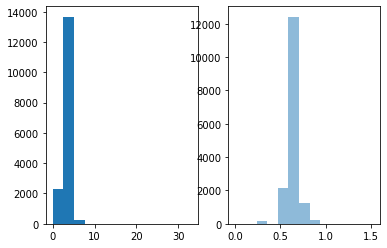

In [43]:
k_bed = len(X_train['bedrooms'].unique())
plt.subplot(1,2,1)
plt.hist(X_train['bedrooms'],bins=k_bed)
plt.subplot(1,2,2)
plt.hist(np.log10(X_train['bedrooms']+1),bins=k_bed, alpha=0.5)
plt.show()

In [44]:
X_ohe = OneHotEncoder()
X_ohe.fit(  X_train['bedrooms'].values.astype(str).reshape(-1,1) )
x_new = X_ohe.transform(X_train.loc[:10,['bedrooms']].astype(str))
x_new

<13322x13 sparse matrix of type '<class 'numpy.float64'>'
	with 13322 stored elements in Compressed Sparse Row format>

Dummy

In [45]:
x_new = pd.get_dummies(X_train, columns = ['bedrooms'])
x_new

,bathrooms,sqft_living,sqft_lot,yr_built,floors,lat,long,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33
1956,1.00,960,40946,1945,1.0,47.6951,-121.864,0,1,0,0,0,0,0,0,0,0,0,0,0
15678,1.75,1510,9720,1948,1.0,47.7728,-122.258,0,0,0,1,0,0,0,0,0,0,0,0,0
8729,2.25,1670,6414,1961,1.0,47.6921,-122.386,0,0,0,1,0,0,0,0,0,0,0,0,0
19064,2.00,2660,192099,1964,1.0,47.2098,-122.016,0,0,0,1,0,0,0,0,0,0,0,0,0
11291,1.75,1690,13500,1978,1.0,47.5897,-122.233,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,5.00,3960,94089,1998,2.0,47.3800,-122.011,0,0,0,0,0,1,0,0,0,0,0,0,0
19648,2.50,1400,1262,2008,2.0,47.5342,-122.349,0,0,1,0,0,0,0,0,0,0,0,0,0
9845,2.25,2360,14950,1978,1.0,47.3856,-122.158,0,0,0,1,0,0,0,0,0,0,0,0,0
10799,2.00,2370,76665,1978,2.0,47.2831,-122.279,0,0,0,0,1,0,0,0,0,0,0,0,0


Соединим категории

In [46]:
from scipy.stats import shapiro, normaltest, ttest_rel, ttest_ind, kstest
from scipy.stats import ks_2samp, chi2_contingency
from scipy.stats import poisson,  planck

In [47]:
import warnings
warnings.simplefilter('ignore')

In [48]:
obs = np.array([[50, 10, 20], [50, 20, 20]])
g, p, dof, expctd = chi2_contingency(obs)
p

0.2522549958439728

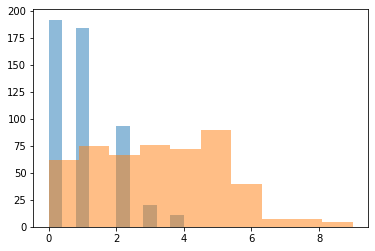

In [49]:
mu1 = 1
r = poisson.rvs(mu1, size=500)

lambda_ = 1
y = planck.rvs(lambda_, size=500)+np.random.randint(6,size=(1,500))

new_data = pd.DataFrame(np.hstack([r.reshape((-1,1)),y.reshape((-1,1))]),columns=['r','y'])
new_data['id']=np.arange(500)
plt.hist(new_data.r, alpha=0.5, label='r')
plt.hist(new_data.y, alpha=0.5, label='y')
plt.show()

In [50]:
new_data.head()

,r,y,id
0,0,0,0
1,0,5,1
2,0,0,2
3,1,1,3
4,1,5,4


In [51]:
table = new_data.pivot_table( values='id', index='y', columns='r', aggfunc='count')
table.fillna(0,inplace =True)
table = table+5 # добавиМ +5 искусственно, Т.К. не дает верных результатов для частот меньше 5
table

r,0,1,2,3,4
y,,,,,
0,24.0,29.0,22.0,6.0,6.0
1,36.0,32.0,17.0,8.0,7.0
2,32.0,31.0,14.0,9.0,6.0
3,32.0,37.0,15.0,9.0,8.0
4,33.0,33.0,16.0,9.0,6.0
5,44.0,32.0,25.0,8.0,6.0
6,19.0,18.0,16.0,6.0,6.0
7,10.0,7.0,5.0,5.0,5.0
8,7.0,8.0,7.0,5.0,5.0


In [52]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.5532374247325083

Меняем  i2,j2 - пары значений признаков и ищем похожие гистограммы (частоты совпадают по характеру или нет)

r     0    4
y           
0  24.0  6.0
1  36.0  7.0
2  32.0  6.0
3  32.0  8.0
4  33.0  6.0
5  44.0  6.0
6  19.0  6.0
7  10.0  5.0
8   7.0  5.0
9   5.0  6.0


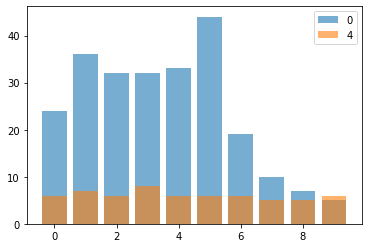

0.050826892335434005

In [54]:

i2=0
j2=4
print(table.iloc[:,[i2,j2]])

plt.bar( table.index, table.iloc[:,i2].values,alpha=0.6,label=str(i2))
plt.bar( table.index, table.iloc[:,j2].values,alpha=0.6,label=str(j2))
plt.legend()
plt.show()
chi2, p, dof, expected = chi2_contingency( table.iloc[:,[i2,j2]], correction=False)
p

In [55]:
X = [[0, 1, 2], [3,4,5]] # объединить r по этим значениям

Проверим для признака bedrooms:
 - найдем уникальные значения floors
 - попарно сверим частоты относительно floors (в идеале нужно смотреть по целевому признаку, но тут не классификатор и это не так напрямую)
 - выбираем похожие частоты

In [56]:
floor = X_train['floors'].unique().tolist()

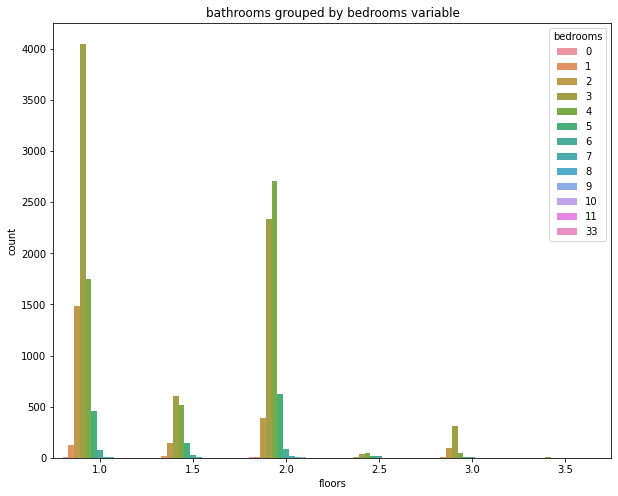

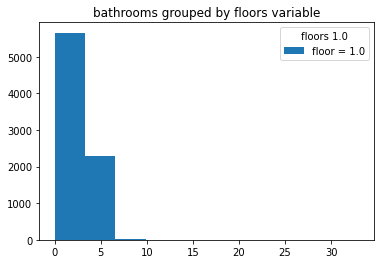

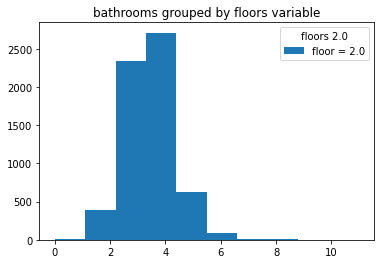

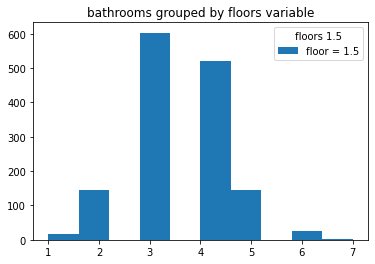

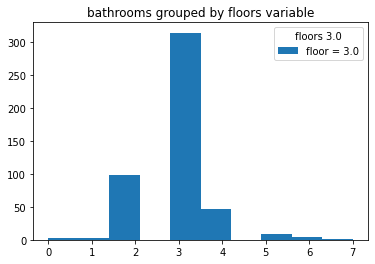

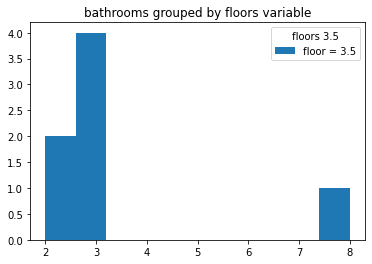

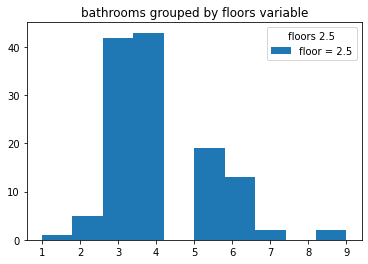

In [57]:
plt.figure(figsize=(10, 8))
#X_train['bedrooms', 'floors']


sns.countplot(x="floors", hue='bedrooms', data=X_train)
plt.title('bathrooms grouped by bedrooms variable')
plt.legend(title='bedrooms', loc='upper right')

plt.show()

for i in floor:
  
  d_x = X_train.loc[X_train.floors == i,['bedrooms']].values
  
  plt.hist(d_x,label = 'floor = '+str(i))
  plt.title('bathrooms grouped by floors variable')
  plt.legend(title='floors '+str(i), loc='upper right')

  plt.show()



Можно вспомнить, что делали разбиение на интервалы целевого признака и решить вопрос по целевому признаку и его интервалам

In [58]:
X_train['ID'] = np.arange(X_train.shape[0])
X_train['Y10'] =  KBinsDiscretizer(n_bins=10, encode='ordinal').fit_transform(y_train.values.reshape(-1,1))

In [59]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,floors,lat,long,ID,Y10
1956,1,1.00,960,40946,1945,1.0,47.6951,-121.864,0,4.0
15678,3,1.75,1510,9720,1948,1.0,47.7728,-122.258,1,2.0
8729,3,2.25,1670,6414,1961,1.0,47.6921,-122.386,2,6.0
19064,3,2.00,2660,192099,1964,1.0,47.2098,-122.016,3,5.0
11291,3,1.75,1690,13500,1978,1.0,47.5897,-122.233,4,8.0


Частотная картина для значения 5 и 6 спален по Y10

In [60]:
bed_and_bath_s = X_train.loc[X_train['bedrooms'].isin([5, 6]), ['ID','bedrooms', 'Y10']].sample(1000)
table = bed_and_bath_s.pivot_table(values='ID', index='Y10', columns='bedrooms', aggfunc='count')+5
table

bedrooms,5,6
Y10,,
0.0,24,8
1.0,46,8
2.0,56,17
3.0,57,12
4.0,55,16
5.0,89,17
6.0,89,14
7.0,112,34
8.0,140,33


In [61]:
table.fillna(5,inplace=True)
table

bedrooms,5,6
Y10,,
0.0,24,8
1.0,46,8
2.0,56,17
3.0,57,12
4.0,55,16
5.0,89,17
6.0,89,14
7.0,112,34
8.0,140,33


Используем стат.анализ (Хи-квадрат - на сходство распределений):
 - подаем таблицу частот
 - смотрим р (меньше уровня значимости (например 0.05) не можем отвергнуть H0)

In [62]:
chi2, p, dof, expected = chi2_contingency( table, correction=False)
p

0.35877459951694346

Уровень значимости ниже р, т.е. скорее похожи

{'1': 152, '3': 7350, '2': 2122, '4': 5070, '5': 1248, '6': 211, '7': 29, '10': 2, '11': 1, '9': 5, '8': 8, '0': 10, '33': 1}


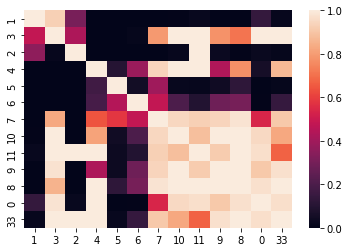

In [63]:
bed_max = len(X_train['bedrooms'].unique())
CHI_bedrooms = []
numb_bed ={}
for i_br in X_train['bedrooms'].unique():
  numb_bed[str(i_br)] = X_train.loc[X_train['bedrooms'].isin([i_br]), :].shape[0]
  for j_br in X_train['bedrooms'].unique():
    X_d = X_train.loc[X_train['bedrooms'].isin([i_br, j_br]), ['ID','bedrooms', 'Y10']]

    if X_d.shape[0]>1000:
      n_samples = 1000
    else:
      n_samples = X_d.shape[0] 
    if n_samples>0:
      bed_and_bath_s = X_train.loc[X_train['bedrooms'].isin([i_br, j_br]), ['ID','bedrooms', 'Y10']].sample(n_samples)
      table = bed_and_bath_s.pivot_table(values='ID', index='Y10', columns='bedrooms', aggfunc='count')+5
      table.fillna(5,inplace=True)
      chi2, p, dof, expected = chi2_contingency( table, correction=False)
    else:
       p = 0
    CHI_bedrooms.append( p)
CHI_bedrooms = np.array(CHI_bedrooms).reshape((bed_max,bed_max))
sns.heatmap(data = CHI_bedrooms, xticklabels=X_train['bedrooms'].unique(),yticklabels=X_train['bedrooms'].unique())
print(numb_bed)


Список объединений по итогам анализа тепловой диаграммы для Хи-квадрат

In [64]:
list_code=[[0],[1],[2],[3],[4, 5, 6],[7,8,9,10,11,33]]

Новый признак:

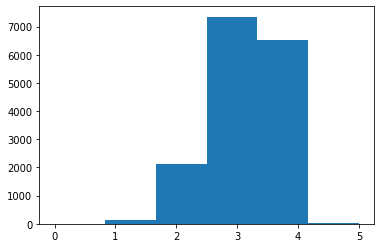

In [65]:
x_new = np.zeros(shape = (X_train.shape[0],1))
k = 0
for x_list in list_code:
  bed_ind = np.where(X_train['bedrooms'].isin(x_list))[0]
  x_new[bed_ind] = k
  k += 1
plt.hist(x_new, bins = k)
plt.show()  

## Сокращение размерности

In [66]:
from sklearn.decomposition import TruncatedSVD

### SVD  

X = VEU  -  latent semantic analysis (LSA))
X' = XU
VE - матрица оценок


- не центрирует данные перед вычислением разложения по сингулярным значениям
- эффективно работает с разреженными матрицами
- делает усеченный ответ (не все строки V и столбцы U считаем )

u,s,v [[ 1.94500009e+03 -1.62228995e+00  3.27383959e-02]
 [ 1.94800171e+03 -6.08378496e-01  3.28221577e-01]
 [ 1.96100276e+03  4.91334705e-02  5.28607418e-01]
 ...
 [ 1.97800274e+03  2.06522805e-02  5.33857409e-01]
 [ 1.97800296e+03 -4.12837120e-02 -5.24992855e-01]
 [ 1.96100276e+03  4.91334705e-02  5.28607418e-01]] [2.50965618e+05 1.40661107e+02 5.75286782e+01] [[ 1.07741857e-03  1.07741857e-03  7.61941625e-04  9.99998549e-01]
 [ 6.79291700e-01  6.79291700e-01  2.77709858e-01 -1.67536412e-03]
 [ 1.96371141e-01  1.96371141e-01 -9.60664694e-01  3.08823037e-04]]
X_restored dot way [[1.000e+00 1.000e+00 1.000e+00 1.945e+03]
 [1.800e+00 1.800e+00 1.000e+00 1.948e+03]
 [2.300e+00 2.300e+00 1.000e+00 1.961e+03]
 ...
 [2.300e+00 2.300e+00 1.000e+00 1.978e+03]
 [2.000e+00 2.000e+00 2.000e+00 1.978e+03]
 [2.300e+00 2.300e+00 1.000e+00 1.961e+03]] svdinverse way [[1.000e+00 1.000e+00 1.000e+00 1.945e+03]
 [1.800e+00 1.800e+00 1.000e+00 1.948e+03]
 [2.300e+00 2.300e+00 1.000e+00 1.961e+03]
 ...
 

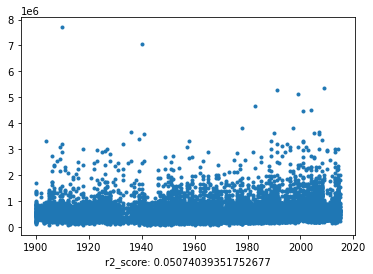

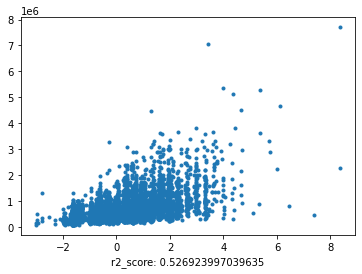

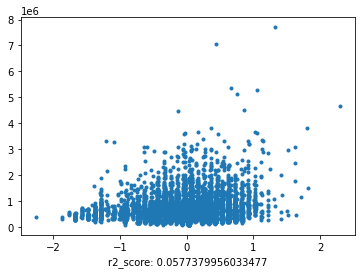

In [67]:
n_comp=3
svd = TruncatedSVD(n_components=n_comp, n_iter=7, random_state=42)

x_new=svd.fit_transform(X_train.loc[:,['bathrooms','bathrooms','floors','yr_built']])

V=svd.components_
S=svd.singular_values_ 
print('u,s,v', x_new,S,V)
print('X_restored dot way',np.round(np.dot(x_new,V),1),'svdinverse way',np.round(svd.inverse_transform(x_new),1))

for i in range(n_comp):
  plt.plot(x_new[:,i],y_train,'.')

  r2_ = np.corrcoef(  y_train,x_new[:,i])
  plt.xlabel('r2_score: '+str(r2_[0,1]))
  plt.show()

In [68]:
from sklearn.cluster import FeatureAgglomeration

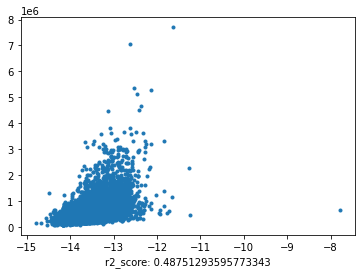

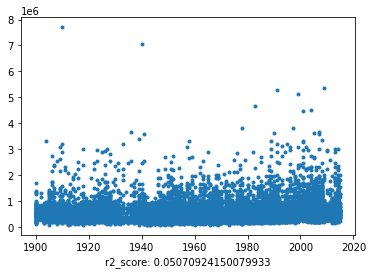

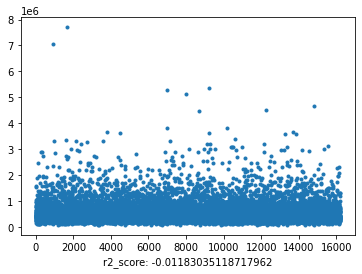

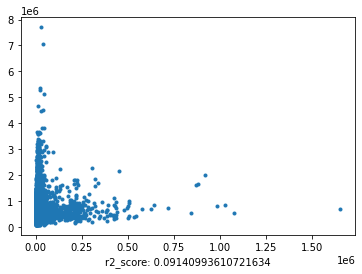

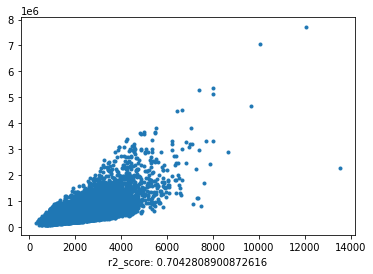

In [69]:
agglo = FeatureAgglomeration(n_clusters=5)
agglo.fit(X_train.iloc[:,:-1])
x_new = agglo.transform(X_train.iloc[:,:-1])

for i in range(5):
  plt.plot(x_new[:,i],y_train,'.')

  r2_ = np.corrcoef(  y_train,x_new[:,i])
  plt.xlabel('r2_score: '+str(r2_[0,1]))
  plt.show()

Можно сделать что-то свое

In [70]:
from sklearn.preprocessing import FunctionTransformer

In [71]:
transformer = FunctionTransformer(np.log1p, validate=True)
X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

### Последовательный анализ:

- построить разные варианты признаков:
  - сделать построение категорийных признаков как непрерывных или бинарных
  - сделать непрерывные признаки сложными
  - сделать непрерывные признеаки дискретными
  - сделать эмбединги
- сделать селекцию признаков



In [72]:
def cat_merge(X_,Y10,ID,FEATURE_NAME):
  '''
  Исследование на близость категорий по распределению
  Принимаем:
  X_, - твблица данных - pandas DataFrame
  Y10 - целевое свойство  - категорийного типа (непрерывное переводим на интервалы)
  ID, - номер уникальный , для подсчета объектов
  FEATURE_NAME - исследуемый признак
  
  Действие:
  вдоль целевого свойства смотрим на различимость распределений значений исследуемого признака
  по тесту Хи2 

  Возвращаем 
  CHI_ - значения p-value для пар значений признака в виде матрицы (строка/столбец - отдельные значения),
  numb_b
  '''
  TARGET_NAME = 'Y10'
  X_[TARGET_NAME] = Y10
  b_max = len(X_[FEATURE_NAME].unique()) #  сколько категорий
  CHI_ = []
  numb_b ={}
  # смотрим на пары категорий
  for i_br in X_[FEATURE_NAME].unique():
    # сохраняем число примеров для этого значения по всем данным
    numb_b[str(i_br)] = X_.loc[X_[FEATURE_NAME].isin([i_br]), :].shape[0]
    for j_br in X_[FEATURE_NAME].unique():
      # выделили подтаблицу
      X_d = X_.loc[X_[FEATURE_NAME].isin([i_br, j_br]), [ID,FEATURE_NAME, TARGET_NAME]]
      # выбираем число примеров для оценки в тесте Хи2
      if X_d.shape[0]>1000:
        n_samples = 1000
      else:
        n_samples = X_d.shape[0] 
      # если значения есть, то оценим, иначе р=0  
      if n_samples>0:
        rez_s = X_.loc[X_[FEATURE_NAME].isin([i_br, j_br]), [ID,FEATURE_NAME, TARGET_NAME]].sample(n_samples)
        # частоты по значениям цели для значений признака
        table = rez_s.pivot_table(values=ID, index=TARGET_NAME, columns=FEATURE_NAME, aggfunc='count')+5
        table.fillna(5,inplace=True)
        chi2, p, dof, expected = chi2_contingency( table, correction=False)
      else:
        p = 0
      CHI_.append( p)
  CHI_ = np.array(CHI_).reshape((b_max,b_max))
  # чем белее, тем больше оснований для объединения значений
  sns.heatmap(data = CHI_, xticklabels=X_[FEATURE_NAME].unique(),yticklabels=X_[FEATURE_NAME].unique())
  print(numb_b)
  return CHI_,numb_b


{'1': 152, '3': 7350, '2': 2122, '4': 5070, '5': 1248, '6': 211, '7': 29, '10': 2, '11': 1, '9': 5, '8': 8, '0': 10, '33': 1}


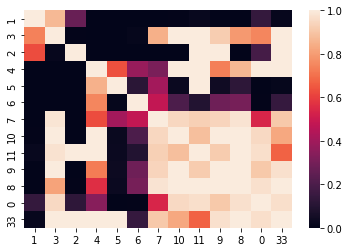

In [73]:
chi_bed,numb_bed = cat_merge(X_train.loc[:,['ID','bedrooms']],X_train['Y10'], 'ID','bedrooms')

In [74]:
def aglomerate_chi(X_,list_code,FEATURE_NAME):
  x_new = np.zeros(shape = (X_.shape[0],1))
  k = 0
  for x_list in list_code:
    b_ind = np.where(X_[FEATURE_NAME].isin(x_list))[0]
    x_new[b_ind] = k
    k += 1
  return x_new  

In [75]:
list_code=[[0],[1, 2, 3],[4],[5, 6],[7, 8,9,10,11,33]]

x_new = aglomerate_chi(X_train,list_code,'bedrooms')
x_new

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [2.],
       [2.]])

Category Encoders - много много методов   https://contrib.scikit-learn.org/category_encoders/

In [76]:
!pip install category_encoders

/home/mariya/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/mariya/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
     |████████████████████████████████| 69 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 9.9 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 4.8 MB/s eta 0:00:01


In [77]:
from category_encoders import TargetEncoder, MEstimateEncoder, GLMMEncoder

In [78]:
# M-вероятностная оценка правдоподобия
encoder = MEstimateEncoder(cols=['yr_built', 'floors'] )
x_new = encoder.fit_transform(X_train.iloc[:,:-1], y_train)

In [79]:
x_new.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,floors,lat,long,ID
1956,1,1.00,960,40946,449697.783748,444496.781953,47.6951,-121.864,0
15678,3,1.75,1510,9720,424623.892027,444496.781953,47.7728,-122.258,1
8729,3,2.25,1670,6414,429156.680527,444496.781953,47.6921,-122.386,2
19064,3,2.00,2660,192099,505298.398219,444496.781953,47.2098,-122.016,3
11291,3,1.75,1690,13500,474065.543989,444496.781953,47.5897,-122.233,4


In [80]:
X_train['yr_built'].head()

1956     1945
15678    1948
8729     1961
19064    1964
11291    1978
Name: yr_built, dtype: int64

In [81]:

# Обобщенная линейная  модель смешения (Generalized linear mixed model.)
encoder = GLMMEncoder(cols=['yr_built', 'floors'] )
x_new = encoder.fit_transform(X_train.iloc[:,:-1], y_train)
x_new.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,floors,lat,long,ID
1956,1,1.00,960,40946,-78606.807610,-254539.671994,47.6951,-121.864,0
15678,3,1.75,1510,9720,-111877.652917,-254539.671994,47.7728,-122.258,1
8729,3,2.25,1670,6414,-106546.411607,-254539.671994,47.6921,-122.386,2
19064,3,2.00,2660,192099,-37801.466673,-254539.671994,47.2098,-122.016,3
11291,3,1.75,1690,13500,-70059.976330,-254539.671994,47.5897,-122.233,4


## Pipeline

Соберем пайплайн

In [82]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [83]:
class AgloEncoding(BaseEstimator, TransformerMixin):
  def __init__(self, column, list_code):
    self.column = column
    self.new_columns = column + '_list' 
    self.list_code = list_code
    
  def fit(self, X, y=None):

    return self

  def transform(self, X, y=None):

    x_new =pd.DataFrame( data = X.values, columns = [self.column], index = X.index)
    #print(x_new)
    k = 0
    x_new[self.new_columns] = 0
    #print(x_new.head())
    for x_list in self.list_code:
      #print(x_list)

      x_new.loc[x_new[self.column].isin(x_list), [self.new_columns]] = k
      #print(x_new.head())
      k += 1
    return x_new.loc[:,[self.new_columns]]  

In [84]:
aglom = AgloEncoding(column='bedrooms',list_code=list_code)
x_new = aglom.fit_transform(X_train['bedrooms'])
x_new.head()

,bedrooms_list
1956,1
15678,1
8729,1
19064,1
11291,1


In [116]:
class KlasterEncoding(BaseEstimator, TransformerMixin):
    def __init__(self, column, n_clusters):
        self.column = column
        self.new_columns = [] 
        self.stx = StandardScaler()
        self.comp = n_clusters
        self.kmeans = KMeans(n_clusters=n_clusters)
        for i in range(self.comp ):
            self.new_columns.append('klast_'+str(i))
    def fit(self, X, y=None):
        self.stx.fit(X[self.column])
        self.kmeans.fit(self.stx.transform(X.loc[:,self.column].values))
        return self

    def transform(self, X, y=None):
        x_new = self.kmeans.transform(self.stx.transform(X.loc[:,self.column].values))
        #print(x_new.shape)
        B = X.copy()
        for i in range(self.comp ):
            #print(x_new[:2,i])
            B['klast_'+str(i)] = 0
            #print(X.shape)
            B.loc[:,['klast_'+str(i)]]  = x_new[:,i]
      
        return B.loc[:,self.new_columns]       
  
  

In [117]:
all_col = X_train.columns[:-2]

In [118]:
clast = KlasterEncoding(column=all_col,n_clusters=5)
x_new = clast.fit_transform(X_train.loc[:,all_col])
x_new.head()

,klast_0,klast_1,klast_2,klast_3,klast_4
1956,4.002789,4.977587,4.043515,6.042386,7.301883
15678,1.210152,3.397585,2.440939,3.799658,7.375685
8729,1.424576,3.088396,2.337924,3.474203,7.422355
19064,5.969298,5.660570,4.835299,5.845413,3.266029
11291,1.533427,2.442256,1.080549,3.286637,6.855085


In [119]:
#соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

class NumericPower(BaseEstimator, TransformerMixin):
    def __init__(self, key, p):
        self.key = key
        self.columns = []
        self.p = p+1

    def fit(self, X, y=None):
        #self.columns = [self.key+'^'+str(col) for col in range(2,self.p)]
        return self

    def transform(self, X):
        Xp = X.copy()
       
        for i in range(2,self.p):
          self.columns += [self.key+'^'+str(i)]
          Xp[self.key+'^'+str(i)] = Xp[self.key].values ** i
        
        return Xp.loc[:,self.columns]
    
class Numericlog(BaseEstimator, TransformerMixin):
    def __init__(self, key, p):
        self.key = key
        self.columns = []
        self.p = p+1

    def fit(self, X, y=None):
        #self.columns = [self.key+'log_'+str(col) for col in range(2,self.p)]
        return self

    def transform(self, X):
        Xp = X.copy()
       
        for i in range(2,self.p):
          self.columns += [self.key+'log_'+str(i)]
          Xp[self.key+'log_'+str(i)] = np.log(np.abs(Xp[self.key].values)+0.01)/np.log(i)

        return Xp.loc[:,self.columns]

class NumericMix(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []
        

    def fit(self, X, y=None):
        return self

    def transform(self, X):

        Xp = X[self.key].copy()
        #print(Xp)
        s = self.key
        for col1 in s[:-1]:
          for col2 in s[1:]:
            #print(col1+'/'+col2)
            
            Xp[col1+'/'+col2] = Xp.loc[:,col1].values/(np.abs(Xp.loc[:,col2].values)+0.01)
            
            Xp[col1+'*'+col2] = Xp.loc[:,col1].values*Xp.loc[:,col2].values
            self.columns += [col1+'/'+col2, col1+'*'+col2]
            #print(self.columns)
        return Xp.loc[:,self.columns]

class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]
    


In [120]:
Numb_power = Pipeline([
                ('selector', NumberSelector(key='sqft_living')),
                ('scaler', NumericPower(key='sqft_living', p=3))
                ])
NN = Numb_power.fit_transform(X_train)
print(NN.shape)
NN.head()

(16209, 2)


,sqft_living^2,sqft_living^3
1956,921600,884736000
15678,2280100,3442951000
8729,2788900,4657463000
19064,7075600,18821096000
11291,2856100,4826809000


In [121]:
Numb_log = Pipeline([
                ('selector', NumberSelector(key='bedrooms')),
                ('scaler', Numericlog(key='bedrooms', p=3))
                ])
NN = Numb_log.fit_transform(X_train)
print(NN.shape)
NN.head()

(16209, 2)


,bedroomslog_2,bedroomslog_3
1956,0.014355,0.009057
15678,1.589763,1.003029
8729,1.589763,1.003029
19064,1.589763,1.003029
11291,1.589763,1.003029


In [122]:
continuous_columns = ["bathrooms", "yr_built", 'sqft_living', 'sqft_lot','lat','long']
cat_columns = ["floors","bedrooms"  ]
discret_columns = ["bathrooms", "yr_built","floors","bedrooms" ]
all_col = X_train.columns[:-2]

In [123]:
Numb_transformer = Pipeline([ ('scaler', NumericMix(key=continuous_columns))])
NN = Numb_transformer.fit_transform(X_train)
print(NN.shape)
NN.head()

(16209, 50)


,bathrooms/yr_built,bathrooms*yr_built,bathrooms/sqft_living,bathrooms*sqft_living,bathrooms/sqft_lot,bathrooms*sqft_lot,bathrooms/lat,bathrooms*lat,bathrooms/long,bathrooms*long,...,lat/yr_built,lat*yr_built,lat/sqft_living,lat*sqft_living,lat/sqft_lot,lat*sqft_lot,lat/lat,lat*lat,lat/long,lat*long
1956,0.000514,1945.00,0.001042,960.0,0.000024,40946.0,0.020962,47.695100,0.008205,-121.86400,...,0.024522,92766.9695,0.049682,45787.296,0.001165,1.952924e+06,0.999790,2274.822564,0.391348,-5812.315666
15678,0.000898,3409.00,0.001159,2642.5,0.000180,17010.0,0.036624,83.602400,0.014313,-213.95150,...,0.024524,93061.4144,0.031637,72136.928,0.004915,4.643516e+05,0.999791,2282.240420,0.390722,-5840.606982
8729,0.001147,4412.25,0.001347,3757.5,0.000351,14431.5,0.047168,107.307225,0.018383,-275.36850,...,0.024320,93524.2081,0.028558,79645.807,0.007436,3.058971e+05,0.999790,2274.536402,0.389654,-5836.845351
19064,0.001018,3928.00,0.000752,5320.0,0.000010,384198.0,0.042355,94.419600,0.016390,-244.03200,...,0.024037,92720.0472,0.017748,125578.068,0.000246,9.068955e+06,0.999788,2228.765216,0.386883,-5760.350957
11291,0.000885,3461.50,0.001035,2957.5,0.000130,23625.0,0.036765,83.281975,0.014316,-213.90775,...,0.024059,94132.4266,0.028159,80426.593,0.003525,6.424609e+05,0.999790,2264.779546,0.389304,-5817.031800


In [124]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,floors,lat,long,ID,Y10
1956,1,1.00,960,40946,1945,1.0,47.6951,-121.864,0,4.0
15678,3,1.75,1510,9720,1948,1.0,47.7728,-122.258,1,2.0
8729,3,2.25,1670,6414,1961,1.0,47.6921,-122.386,2,6.0
19064,3,2.00,2660,192099,1964,1.0,47.2098,-122.016,3,5.0
11291,3,1.75,1690,13500,1978,1.0,47.5897,-122.233,4,8.0


In [125]:
all_col

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'floors', 'lat', 'long'],
      dtype='object')

In [132]:
    


final_transformers = list()
    
for cont_col in continuous_columns:
  cont_transformer = Pipeline([
                               ('selector', NumberSelector(key=cont_col)),
                               ('scaler', StandardScaler())
                               ])
  final_transformers.append((cont_col, cont_transformer))

for cat_col in cat_columns:
  cat_transformer = Pipeline([
                              ('selector', FeatureSelector(column=cat_col)),
                              ('scaler', OHEEncoder(key=cat_col)),
                              ])
  final_transformers.append((cat_col, cat_transformer))    
chi_trans = Pipeline([
                      ('selector', FeatureSelector(column="bedrooms")),
                      ('algo', AgloEncoding(column="bedrooms", list_code=list_code))
                      ])
final_transformers.append(('chi', chi_trans))
klast_trans = Pipeline([
                      ('clast', KlasterEncoding(column= all_col,n_clusters=3))
                      ])
#final_transformers.append(('clast', klast_trans))    
feats = FeatureUnion(final_transformers)

feature_processing = Pipeline([('feats', feats)])



In [133]:
feature_processing.fit(X_train)
X_new = feature_processing.transform(X_train)
pd.DataFrame(data = X_new).head()


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-1.450046,-0.881455,-1.212549,0.607076,0.971586,2.486801,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.477529,-0.779752,-0.617729,-0.131147,1.531583,-0.313378,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.170816,-0.339043,-0.444690,-0.209305,0.949965,-1.223081,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.153356,-0.237341,0.625985,4.180530,-2.526049,1.406529,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.477529,0.237270,-0.423061,-0.041783,0.211952,-0.135702,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [134]:
feature_processing

Pipeline(steps=[('feats',
                 FeatureUnion(transformer_list=[('bathrooms',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='bathrooms')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('yr_built',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='yr_built')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('sqft_living',
                                                 Pipeline(steps=[('selector',
                          

Модель - линейная регрессия

In [135]:
from sklearn.feature_selection import SelectKBest, f_regression

Добавляем селекцию признаков в конвейер (  не очень интересно, т.к. делать селекцию нужно раньше конвейера)

In [136]:
regressor = Pipeline([
    ('features',feats),
    ('selectK',SelectKBest(f_regression, k=10)),
    ('classifier', LinearRegression()),
])

In [137]:
#обучим наш пайплайн
regressor.fit(X_train.loc[:,all_col], y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('bathrooms',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='bathrooms')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('yr_built',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='yr_built')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('sqft_living',
                                                 Pipeline(steps=[('selector',
                       

In [138]:
predictions =  regressor.predict(X_train.iloc[:,:-2])

Посчитаем MAE и коэффициент детерминации (R2)

In [139]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,floors,lat,long
17384,2,1.50,1430,1650,1999,3.0,47.7222,-122.290
722,4,3.25,4670,51836,1988,2.0,47.6350,-122.164
2680,2,0.75,1440,3700,1914,1.0,47.6707,-122.364
18754,2,1.00,1130,2640,1927,1.0,47.6438,-122.357
14554,4,2.50,3180,9603,2002,2.0,47.7717,-122.277
...,...,...,...,...,...,...,...,...
8709,4,2.25,2130,11900,1976,2.0,47.6408,-122.058
12346,3,2.00,1010,14183,1982,1.0,47.6232,-122.043
10458,4,2.50,3410,179419,2004,2.0,47.3602,-121.986
10894,3,1.50,1180,12324,1981,1.0,47.6337,-122.032


In [140]:
X_new = feature_processing.transform(X_test.loc[:,all_col])
pd.DataFrame(data = X_new).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.801701,0.949185,-0.704248,-0.321932,1.166900,-0.540804,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.467506,0.576277,2.799781,0.864530,0.538436,0.354685,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,-1.774219,-1.932377,-0.693433,-0.273468,0.795732,-1.066726,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.450046,-1.491668,-1.028695,-0.298528,0.601859,-1.016976,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.494988,1.050887,1.188360,-0.133913,1.523655,-0.448412,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [141]:
predictions =  regressor.predict(X_test.loc[:,all_col])
 
mean_absolute_error(y_pred=predictions, y_true=y_test), r2_score(y_pred=predictions, y_true=y_test)

(147009.07822610752, 0.5781441976700339)

mae малоинформативен, но вот r2 - очень понятен.

На случай, если кто забыл:

In [142]:

np.where(regressor[1].get_support())[0]

array([ 0,  2,  4,  6,  8, 14, 15, 16, 17, 25])

![r2](images/r2.png "R2 score")

In [143]:
#intercept = regressor[1].intercept_
features = pd.DataFrame(regressor[2].coef_, 
                        np.where(regressor[1].get_support())[0],
                        columns=['coefficient'])
features.head()

,coefficient
0,16103.167806
2,284371.882126
4,92485.968745
6,-59097.838333
8,-97141.524499


Как это можно интерпретировать:

1. Признак 3 из списка трансформера самый важный 
2. остальные признаки уже идут с отрицательным весом
3. вторым по важности признаком является 0 и 4-й 